In [286]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import KFold
%matplotlib inline

hr_train=pd.read_csv(r"C:\Bank\hr_train.csv")
hr_test=pd.read_csv(r"C:\Bank\hr_test.csv")

In [287]:
hr_test["left"]=0

In [288]:
hr_train["source"],hr_test["source"]="train","test"

In [289]:
hr_all=pd.concat([hr_train,hr_test],ignore_index="False")

In [290]:
ll_dummies=pd.get_dummies(hr_all["sales"])
ll_dummies

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,1,0,0
14996,0,0,0,0,0,0,0,0,0,1
14997,0,0,0,0,0,0,0,1,0,0


In [291]:
ll_dummies=ll_dummies.drop(["management"],1)

In [292]:
hr_all=pd.concat([hr_all,ll_dummies],axis=1)

In [293]:
hr_all=hr_all.drop(["sales"],1)

In [294]:
ll_dummies=pd.get_dummies(hr_all["salary"])
ll_dummies

,high,low,medium
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,0,1


In [295]:
ll_dummies=ll_dummies.drop(["low"],1)

In [296]:
hr_all=pd.concat([hr_all,ll_dummies],axis=1)

In [297]:
hr_all=hr_all.drop(["salary"],1)

In [298]:
hr_all

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,source,IT,RandD,accounting,hr,marketing,product_mng,support,technical,high,medium
0,0.42,0.46,2,150,3,0,1,0,train,0,0,0,0,0,0,0,0,0,1
1,0.66,0.77,2,171,2,0,0,0,train,0,0,0,0,0,0,0,1,0,1
2,0.55,0.49,5,240,3,0,0,0,train,0,0,0,0,0,0,0,1,1,0
3,0.22,0.88,4,213,3,1,0,0,train,0,0,0,0,0,0,0,1,0,1
4,0.20,0.72,6,224,4,0,1,0,train,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.88,0.61,4,177,4,1,0,0,test,0,0,0,0,0,0,1,0,0,0
14995,0.11,0.85,7,302,4,0,0,0,test,0,0,0,0,0,0,0,0,0,0
14996,1.00,0.88,4,191,4,0,0,0,test,0,0,0,0,0,0,0,1,0,0
14997,0.92,0.98,3,257,3,0,0,1,test,0,0,0,0,0,0,0,0,0,1


In [299]:
train=hr_all.loc[hr_all["source"]=="train"]
test=hr_all.loc[hr_all["source"]=="test"]

In [300]:
train=train.drop(["source"],1)
test=test.drop(["source"],1)

In [301]:
for cols in hr_all.columns:
    print('"',cols,'"',',',end ="",sep="")

"satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company","Work_accident","left","promotion_last_5years","source","IT","RandD","accounting","hr","marketing","product_mng","support","technical","high","medium",

In [302]:
formula="left~"+"+".join(["satisfaction_level","last_evaluation","number_project",
                          "average_montly_hours","time_spend_company","Work_accident",
                          "promotion_last_5years","IT","RandD","accounting",
                          "hr","marketing","product_mng","support","technical","high","medium"])
formula

'left~satisfaction_level+last_evaluation+number_project+average_montly_hours+time_spend_company+Work_accident+promotion_last_5years+IT+RandD+accounting+hr+marketing+product_mng+support+technical+high+medium'

In [303]:
import statsmodels.formula.api as smf
lm=LogisticRegression()
lm=smf.ols(formula,train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   left   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     88.05
Date:                Thu, 28 May 2020   Prob (F-statistic):          1.39e-287
Time:                        19:51:53   Log-Likelihood:                -5931.1
No. Observations:               10499   AIC:                         1.190e+04
Df Residuals:                   10481   BIC:                         1.203e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.4895      0.026     18.766      0.000       0.438       0.541
satisfaction_level       -0.5218      0.017    -30.135      0.000      -0.556      -0.488
last_evaluation           0.0846      0.027      3.127      0.002       0.032       0.138
number_project           -0.0272      0.004     -6.870      0.000      -0.035      -0.019
average_montly_hours      0.0005    9.4e-05      5.772      0.000       0.000       0.001
time_spend_company        0.0318      0.003     10.751      0.000       0.026       0.038
Work_accident            -0.1064      0.012     -8.957      0.000      -0.130      -0.083
promotion_last_5years    -0.0650      0.029     -2.246      0.025      -0.122      -0.008
IT                       -0.0180      0.017     -1.083      0.279      -0.050       0.015
RandD                    -0.0232      0.020     -1.163      0.245      -0.062       0.016
accounting                0.0368      0.020      1.839      0.066      -0.002       0.076
hr                        0.0392      0.020      1.966      0.049       0.000       0.078
marketing                 0.0299      0.019      1.597      0.110      -0.007       0.067
product_mng              -0.0030      0.018     -0.163      0.870      -0.039       0.033
support                   0.0078      0.013      0.594      0.552      -0.018       0.034
technical                 0.0173      0.012      1.411      0.158      -0.007       0.041
high                     -0.1879      0.016    -11.978      0.000      -0.219      -0.157
medium                   -0.0673      0.009     -7.706      0.000      -0.084      -0.050
==============================================================================
Omnibus:                     1875.686   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1286.842
Skew:                           0.747   Prob(JB):                    3.68e-280
Kurtosis:                       2.157   Cond. No.                     1.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [304]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = dmatrices(formula, train, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,39.354001,Intercept
1,1.071287,satisfaction_level
2,1.245778,last_evaluation
3,1.368523,number_project
4,1.274315,average_montly_hours
5,1.068973,time_spend_company
6,1.007169,Work_accident
7,1.028276,promotion_last_5years
8,1.152767,IT
9,1.101652,RandD


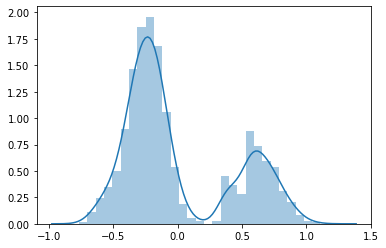

In [305]:
import seaborn as sns
sns.distplot(lm.resid)

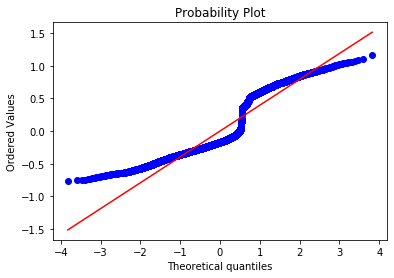

In [306]:
from scipy import stats
import pylab

stats.probplot( lm.resid, dist="norm", plot=pylab )
pylab.show()

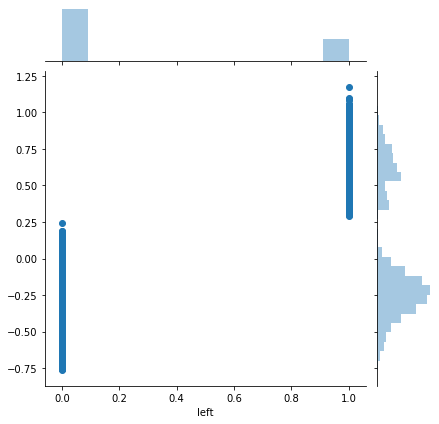

In [307]:
sns.jointplot(train["left"], lm.resid )

In [308]:
ld_train, ld_test=train_test_split(train, test_size=0.2,random_state=2)

In [309]:
y_train=ld_train["left"]
x_train=ld_train.drop(["left"],1)
y_test=ld_test["left"]
x_test=ld_test.drop(["left"],1)

# Logistic Regression

In [310]:
logr=LogisticRegression(penalty="none",class_weight="balanced",random_state=2)

In [311]:
logr.fit(x_train,y_train)

C:\Users\Kshitiz_Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=2, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [312]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,logr.predict(x_test))

0.6869006102877072

In [313]:
prob_score=pd.Series(list(zip(*logr.predict_proba(x_train)))[1])

In [314]:
cutoffs=np.linspace(0,1,100)

In [315]:
KS_cut=[]
for cutoff in cutoffs:
    predicted=pd.Series([0]*len(y_train))
    predicted[prob_score>cutoff]=1
    df=pd.DataFrame(list(zip(y_train,predicted)),columns=["real","predicted"])
    TP=len(df[(df["real"]==1) &(df["predicted"]==1) ])
    FP=len(df[(df["real"]==0) &(df["predicted"]==1) ])
    TN=len(df[(df["real"]==0) &(df["predicted"]==0) ])
    FN=len(df[(df["real"]==1) &(df["predicted"]==0) ])
    P=TP+FN
    N=TN+FP
    KS=(TP/P)-(FP/N)
    KS_cut.append(KS)

cutoff_data=pd.DataFrame(list(zip(cutoffs,KS_cut)),columns=["cutoff","KS"])

KS_cutoff=cutoff_data[cutoff_data["KS"]==cutoff_data["KS"].max()]["cutoff"]

In [316]:
prob_score_test=pd.Series(list(zip(*logr.predict_proba(x_test)))[1])

predicted_test=pd.Series([0]*len(y_test))
predicted_test[prob_score_test>float(KS_cutoff)]=1

df_test=pd.DataFrame(list(zip(y_test,predicted_test)),columns=["real","predicted"])

k=pd.crosstab(df_test['real'],df_test["predicted"])
print('confusion matrix :\n \n ',k)
TN=k.iloc[0,0]
TP=k.iloc[1,1]
FP=k.iloc[0,1]
FN=k.iloc[1,0]
P=TP+FN
N=TN+FP

confusion matrix :
 
  predicted     0    1
real                
0          1069  411
1           219  401


In [320]:
test=test.drop(["left"],1)

In [321]:
Final=logr.predict(test)
final=pd.DataFrame(Final)

In [322]:
final[0].value_counts()

0    2548
1    1952
Name: 0, dtype: int64

# Random Forrest

In [323]:
from sklearn.ensemble import RandomForestRegressor 

In [324]:
rf = RandomForestRegressor( n_estimators=200,n_jobs=-1)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [325]:
p_test=rf.predict(x_test)

residual=p_test-y_test

rmse_rf=np.sqrt(np.dot(residual,residual)/len(p_test))

rmse_rf

0.32956054589346934

In [326]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,rf.predict(x_test))

0.8600283347863993

In [328]:
Final=rf.predict(test)
final=pd.DataFrame(Final)

In [329]:
final.loc[final[0]<=0.5]=0
final.loc[final[0]>0.5]=1

In [330]:
final[0].value_counts()

0.0    3442
1.0    1058
Name: 0, dtype: int64

In [331]:
final = final.rename(index=str,columns={0:"left"})


In [332]:
final.to_csv("Kshitiz_Gupta_P4_part2.csv",index=False)

In [333]:
hr_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,source
0,0.42,0.46,2,150,3,0,1,0,sales,medium,train
1,0.66,0.77,2,171,2,0,0,0,technical,medium,train
2,0.55,0.49,5,240,3,0,0,0,technical,high,train
3,0.22,0.88,4,213,3,1,0,0,technical,medium,train
4,0.20,0.72,6,224,4,0,1,0,technical,medium,train
...,...,...,...,...,...,...,...,...,...,...,...
10494,0.82,0.84,3,237,2,0,0,0,technical,low,train
10495,0.85,0.81,3,205,3,0,0,0,marketing,high,train
10496,0.32,0.95,5,172,2,0,1,0,sales,low,train
10497,0.51,0.76,4,140,3,0,1,0,support,low,train


In [334]:
hr_train["average_montly_hours"].mean()

201.0598152204972

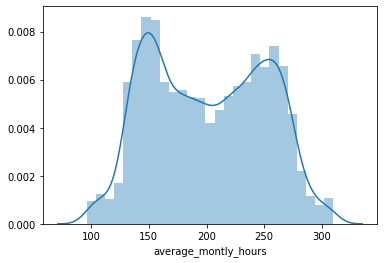

In [335]:
sns.distplot(hr_train["average_montly_hours"])

In [336]:
round(hr_train.groupby("salary")["left"].value_counts())

salary  left
high    0        759
        1        121
low     0       3352
        1       1752
medium  0       3313
        1       1202
Name: left, dtype: int64

In [337]:
hr_train.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105057,-0.144222,-0.029072,-0.102558,0.061912,-0.295924,0.029335
last_evaluation,0.105057,1.000000,0.357704,0.333951,0.122385,-0.013426,0.011817,-0.004672
number_project,-0.144222,0.357704,1.000000,0.418749,0.196522,-0.006379,0.024952,-0.012400
average_montly_hours,-0.029072,0.333951,0.418749,1.000000,0.121967,-0.010584,0.061921,-0.003187
time_spend_company,-0.102558,0.122385,0.196522,0.121967,1.000000,-0.002755,0.118710,0.070742
Work_accident,0.061912,-0.013426,-0.006379,-0.010584,-0.002755,1.000000,-0.103471,0.042958
left,-0.295924,0.011817,0.024952,0.061921,0.118710,-0.103471,1.000000,-0.037015
promotion_last_5years,0.029335,-0.004672,-0.012400,-0.003187,0.070742,0.042958,-0.037015,1.000000


In [338]:
round(hr_train.groupby("Work_accident")["left"].value_counts())

Work_accident  left
0              0       6179
               1       2805
1              0       1245
               1        270
Name: left, dtype: int64

In [339]:
round(hr_train.groupby("left")["time_spend_company"].median())

left
0    3
1    3
Name: time_spend_company, dtype: int64

In [340]:
round(hr_train.groupby("sales")["average_montly_hours"].median())

sales
IT             200
RandD          197
accounting     202
hr             196
management     196
marketing      196
product_mng    200
sales          202
support        201
technical      200
Name: average_montly_hours, dtype: int64

In [341]:
round(hr_train.groupby("left")["number_project"].mean())

left
0    4.0
1    4.0
Name: number_project, dtype: float64